In [1]:
import skimage.io as io
import sklearn.metrics
from sklearn.metrics import jaccard_score
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from tqdm import tqdm

In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [3]:
def filter_pixel(img):
    mask_=img.copy()
    mask_[img>125]=1
    mask_[img<=125]=0
    return mask_

In [4]:
def c_metrics_score(predi,real):
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(real, predi).ravel()
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    sensitivity=tp/(fn+tp)
    specifity=tn/(fp+tn)
    return accuracy,sensitivity,specifity

In [5]:
f = open("C:\\Users\\zelmouaffek\\Desktop\\results_all_osteo\\Test_volumes_slices_order.txt", "r")
a=f.readline()
num_case=a[6:9]
Num=[]
Case=[]
for x in f :
    num_case=a[6:9]
    i=1
    while a[6:9]==num_case :
        i+=1
        a=f.readline()
    Num.append(i)
    Case.append(num_case)

In [15]:
def plot_osteo(Cas) :
    h,k=0,Cas
    for i in range(k):
        h+=Num[i]
    IGT=I_GT[h:h+Num[k]]
    Ipred=I_pred[h:h+Num[k]]
    Ilabels=I_labels[h:h+Num[k]]
    j=1
    fig=plt.figure(figsize=(20, 20))
    fig.suptitle(Case[k],ha='center',va='center')
    for i in range (Num[k]) :
        img=IGT[i]
        figure(num=1, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
        plt.subplot(7,5,j)
        j+=1
        mask_1=Ilabels[i]
        masked_1 = np.ma.masked_where(mask_1 == 0, mask_1)
        plt.imshow(img, 'gray', interpolation='none')
        plt.imshow(masked_1, interpolation='none', alpha=0.5,cmap='prism')
        plt.title("True Labels")
        plt.subplot(7,5,j)
        j+=1
        mask=Ipred[i]
        masked = np.ma.masked_where(mask == 0, mask)
        plt.imshow(img, 'gray', interpolation='none')
        plt.imshow(masked, 'jet', interpolation='none', alpha=0.5)
        plt.title("Unet-Mask")

In [7]:
I_pred=io.imread(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test-masks_Osteo.tif')
I_GT=io.imread(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test-volume_Osteo.tif')
I_labels=io.imread(r'C:\Users\zelmouaffek\Desktop\Scripts_IRMA\Data\test-labels_Osteo.tif')

In [8]:

Accuracy=[]
Sensitivity=[]
Specifity=[]
Jaccard=[]
k=0
for j in tqdm(range(len(Num))):
    #cas
    test_ls=I_labels[k:k+Num[j]]
    test_ms=I_pred[k:k+Num[j]]
    k+=Num[j]
    Accu_l=[]
    Sensitivity_l=[]
    Specifity_l=[]
    jaccard_score_l=[]
    for i in range(Num[j]):
        #frame by frame for case
        predict=test_ms[i]
        real=test_ls[i]
        predict_=filter_pixel(predict)
        real_=filter_pixel(real)
        #flatten matrix
        predict_r=predict_.reshape(512*512)
        real_r=real_.reshape(512*512)
        Accu_l.append(c_metrics_score(predict_r,real_r)[0])
        Sensitivity_l.append(c_metrics_score(predict_r,real_r)[1])
        Specifity_l.append(c_metrics_score(predict_r,real_r)[2])
        jaccard_score_l.append(jaccard_score(predict_r,real_r))
    Accuracy.append(Accu_l)
    Sensitivity.append(Sensitivity_l)
    Specifity.append(Specifity_l)
    Jaccard.append(jaccard_score_l)

100%|██████████| 31/31 [06:36<00:00, 12.78s/it]


In [9]:
Cas=[]
Accuracy_mean=[]
Accuracy_std=[]
Sensitivity_mean=[]
Sensitivity_std=[]
Specifity_mean=[]
Specifity_std=[]
Jaccard_mean=[]
Jaccard_std=[]
for j in tqdm(range(len(Num))):
    Cas.append('Osteo_'+str(Case[j]))
    Accuracy_mean.append(statistics.mean(Accuracy[j]))
    Accuracy_std.append(statistics.stdev(Accuracy[j]))
    Sensitivity_mean.append(statistics.mean(Sensitivity[j]))
    Sensitivity_std.append(statistics.stdev(Sensitivity[j]))
    Specifity_mean.append(statistics.mean(Specifity[j]))
    Specifity_std.append(statistics.stdev(Specifity[j]))
    Jaccard_mean.append(statistics.mean(Jaccard[j]))
    Jaccard_std.append(statistics.stdev(Jaccard[j]))

Score_mean_by_case={'Cas':Cas,
    'Accuracy':Accuracy_mean,
    'Sensitivity':Sensitivity_mean,
    'Specifity':Specifity_mean,
    'Jaccard':Jaccard_mean  }
Score_std_by_case={'Cas':Cas,
    'Accuracy':Accuracy_std,
    'Sensitivity':Sensitivity_std,
    'Specifity':Specifity_std,
    'Jaccard':Jaccard_std  }
Score_mean_by_case=pd.DataFrame(Score_mean_by_case,columns=["Cas",'Accuracy','Sensitivity','Specifity','Jaccard'])
Score_std_by_case=pd.DataFrame(Score_std_by_case,columns=["Cas",'Accuracy','Sensitivity','Specifity','Jaccard'])

Score_mean_by_case

100%|██████████| 31/31 [00:00<00:00, 533.25it/s]


,Cas,Accuracy,Sensitivity,Specifity,Jaccard
0,Osteo_005,0.999336,0.962980,0.999544,0.905916
1,Osteo_007,0.996196,0.974931,0.997108,0.916238
2,Osteo_010,0.999005,0.970203,0.999107,0.849361
3,Osteo_014,0.990262,0.930058,0.991526,0.710245
4,Osteo_015,0.999199,0.961917,0.999560,0.878251
5,Osteo_016,0.975243,0.974906,0.975210,0.622380
6,Osteo_017,0.998832,0.956238,0.999558,0.929008
7,Osteo_019,0.998006,0.967779,0.998491,0.830791
8,Osteo_028,0.998882,0.962147,0.999416,0.924203
9,Osteo_032,0.997625,0.970796,0.998561,0.930980


In [11]:
Score_global={'Metric':["Accuracy","Sensitivity","Specifity","Jaccard"],
    'Moyenne':[Score_mean_by_case.Accuracy.mean(),Score_mean_by_case.Sensitivity.mean(),Score_mean_by_case.Specifity.mean(),Score_mean_by_case.Jaccard.mean()],
    'Deviation':[Score_std_by_case.Accuracy.std(),Score_std_by_case.Sensitivity.std(),Score_std_by_case.Specifity.std(),Score_std_by_case.Jaccard.std()],
  }
Score_global=pd.DataFrame(Score_global,columns=["Metric",'Moyenne','Deviation'])
Score_global


,Metric,Moyenne,Deviation
0,Accuracy,0.979382,0.010373
1,Sensitivity,0.791284,0.107421
2,Specifity,0.987524,0.007200
3,Jaccard,0.589216,0.083518


In [12]:
Score_best_mean_by_case=Score_mean_by_case.drop([27,17,28])
Score_best_global={'Metric':["Accuracy","Sensitivity","Specifity","Jaccard"],
    'Moyenne':[Score_best_mean_by_case.Accuracy.mean(),Score_best_mean_by_case.Sensitivity.mean(),Score_best_mean_by_case.Specifity.mean(),Score_best_mean_by_case.Jaccard.mean()],
    'Deviation':[Score_best_mean_by_case.Accuracy.std(),Score_best_mean_by_case.Sensitivity.std(),Score_best_mean_by_case.Specifity.std(),Score_best_mean_by_case.Jaccard.std()],
  }
Score_best_global=pd.DataFrame(Score_best_global,columns=["Metric",'Moyenne','Deviation'])
Score_best_global

,Metric,Moyenne,Deviation
0,Accuracy,0.979296,0.018587
1,Sensitivity,0.836868,0.137849
2,Specifity,0.986519,0.013405
3,Jaccard,0.619823,0.201730


num must be 1 <= num <= 35, not 36


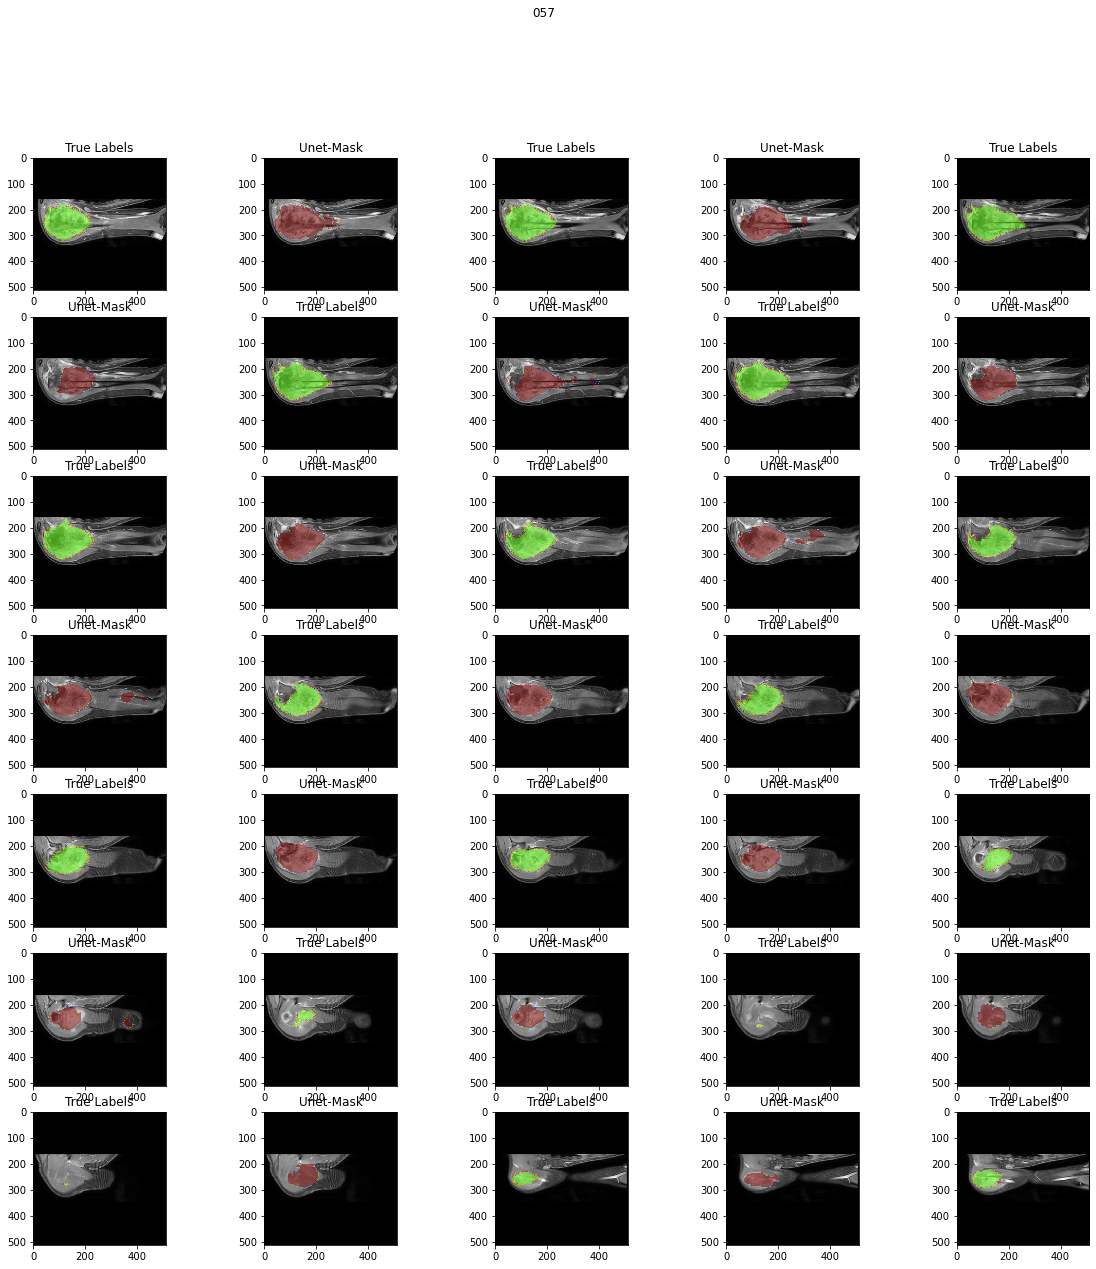

In [16]:
try:
    plot_osteo(19)
except Exception as e:
    print(e)

num must be 1 <= num <= 35, not 36


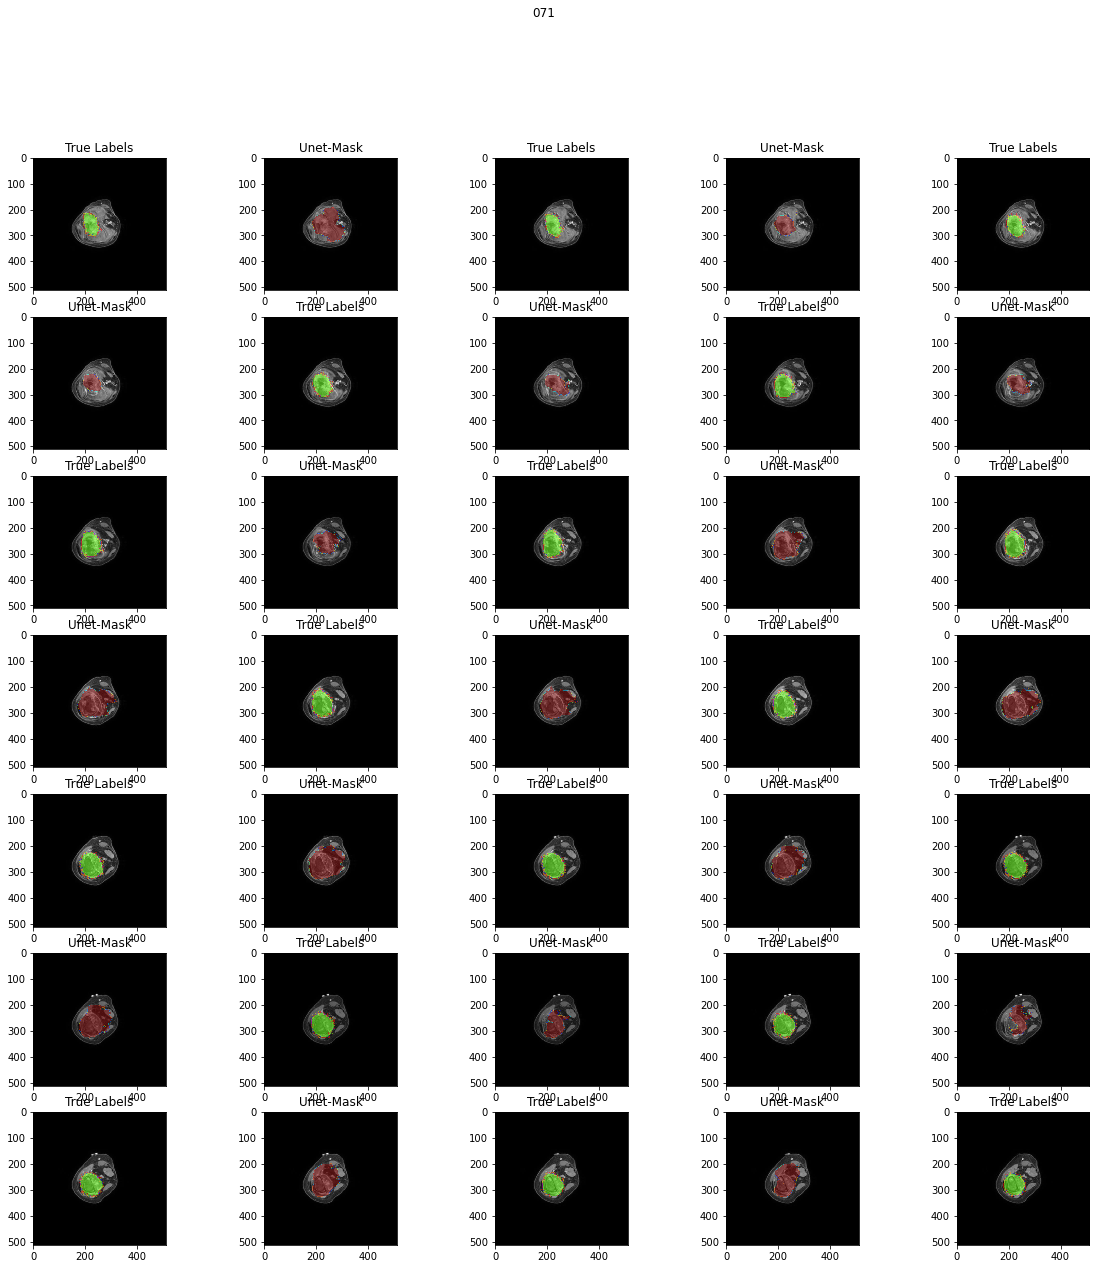

In [17]:
try:
    plot_osteo(25)
except Exception as e:
    print(e)

num must be 1 <= num <= 35, not 36


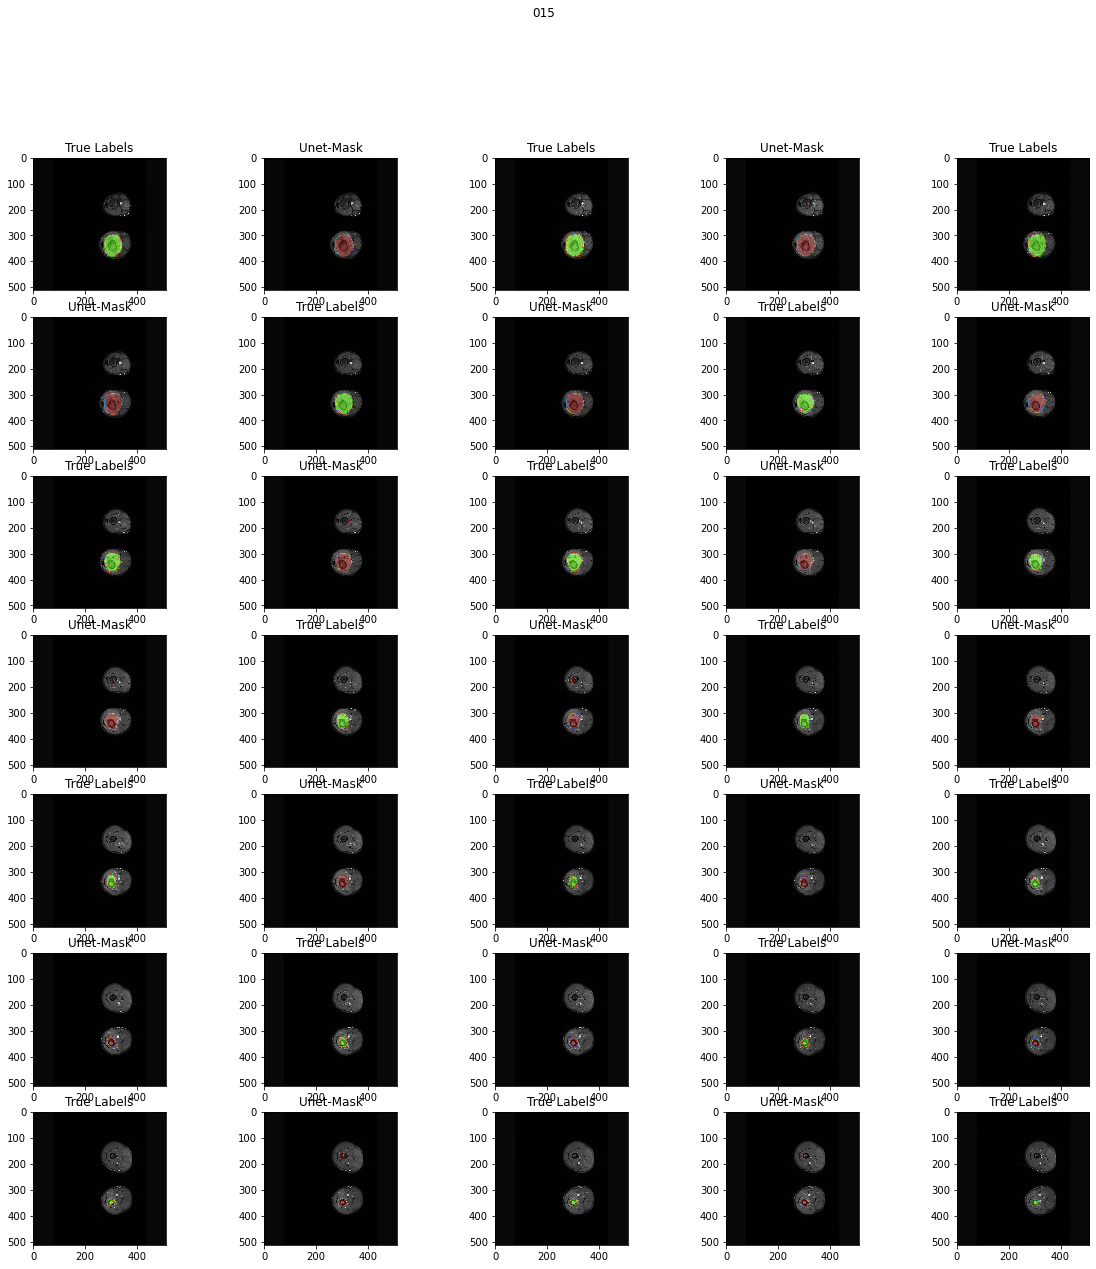

In [18]:
try:
    plot_osteo(4)
except Exception as e:
    print(e)

In [62]:
#Create Masks
import os
path=r'C:\Users\zelmouaffek\Desktop\Masks_Unet'
I_pred=io.imread('C:\\Users\\zelmouaffek\\Desktop\\test-masks.tif')
I_GT=io.imread('C:\\Users\\zelmouaffek\\Desktop\\results_all_osteo\\test-labels.tif')
I=io.imread('C:\\Users\\zelmouaffek\\Desktop\\results_all_osteo\\test-volume.tif')

i=0
for j in range (len(Case)):
    save_path=os.path.join(path,str(Case[j]))
    os.mkdir(save_path)
    GT='GT_'+str(Case[j])+'.tif'
    Pred='Pred_Unet_'+str(Case[j])+'.tif'
    Cas='Case_'+str(Case[j])+'.tif'
    io.imsave(os.path.join(save_path,GT),I_GT[i:i+Num[j]])
    io.imsave(os.path.join(save_path,Pred),I_pred[i:i+Num[j]])
    io.imsave(os.path.join(save_path,Cas),I[i:i+Num[j]])
    i+=Num[j]


C:\Users\zelmouaffek\AppData\Local\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: C:\Users\zelmouaffek\Desktop\Masks_Unet\005\GT_005.tif is a low contrast image
  from ipykernel import kernelapp as app
C:\Users\zelmouaffek\AppData\Local\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: C:\Users\zelmouaffek\Desktop\Masks_Unet\005\Pred_Unet_005.tif is a low contrast image
  app.launch_new_instance()
C:\Users\zelmouaffek\AppData\Local\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: C:\Users\zelmouaffek\Desktop\Masks_Unet\010\GT_010.tif is a low contrast image
  from ipykernel import kernelapp as app
C:\Users\zelmouaffek\AppData\Local\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: C:\Users\zelmouaffek\Desktop\Masks_Unet\010\Pred_Unet_010.tif is a low contrast image
  app.launch_new_instance()
C:\Users\zelmouaffek\AppData\Local\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: C:\Users\zelmouaffek\Deskto